## Studying the pretrained model

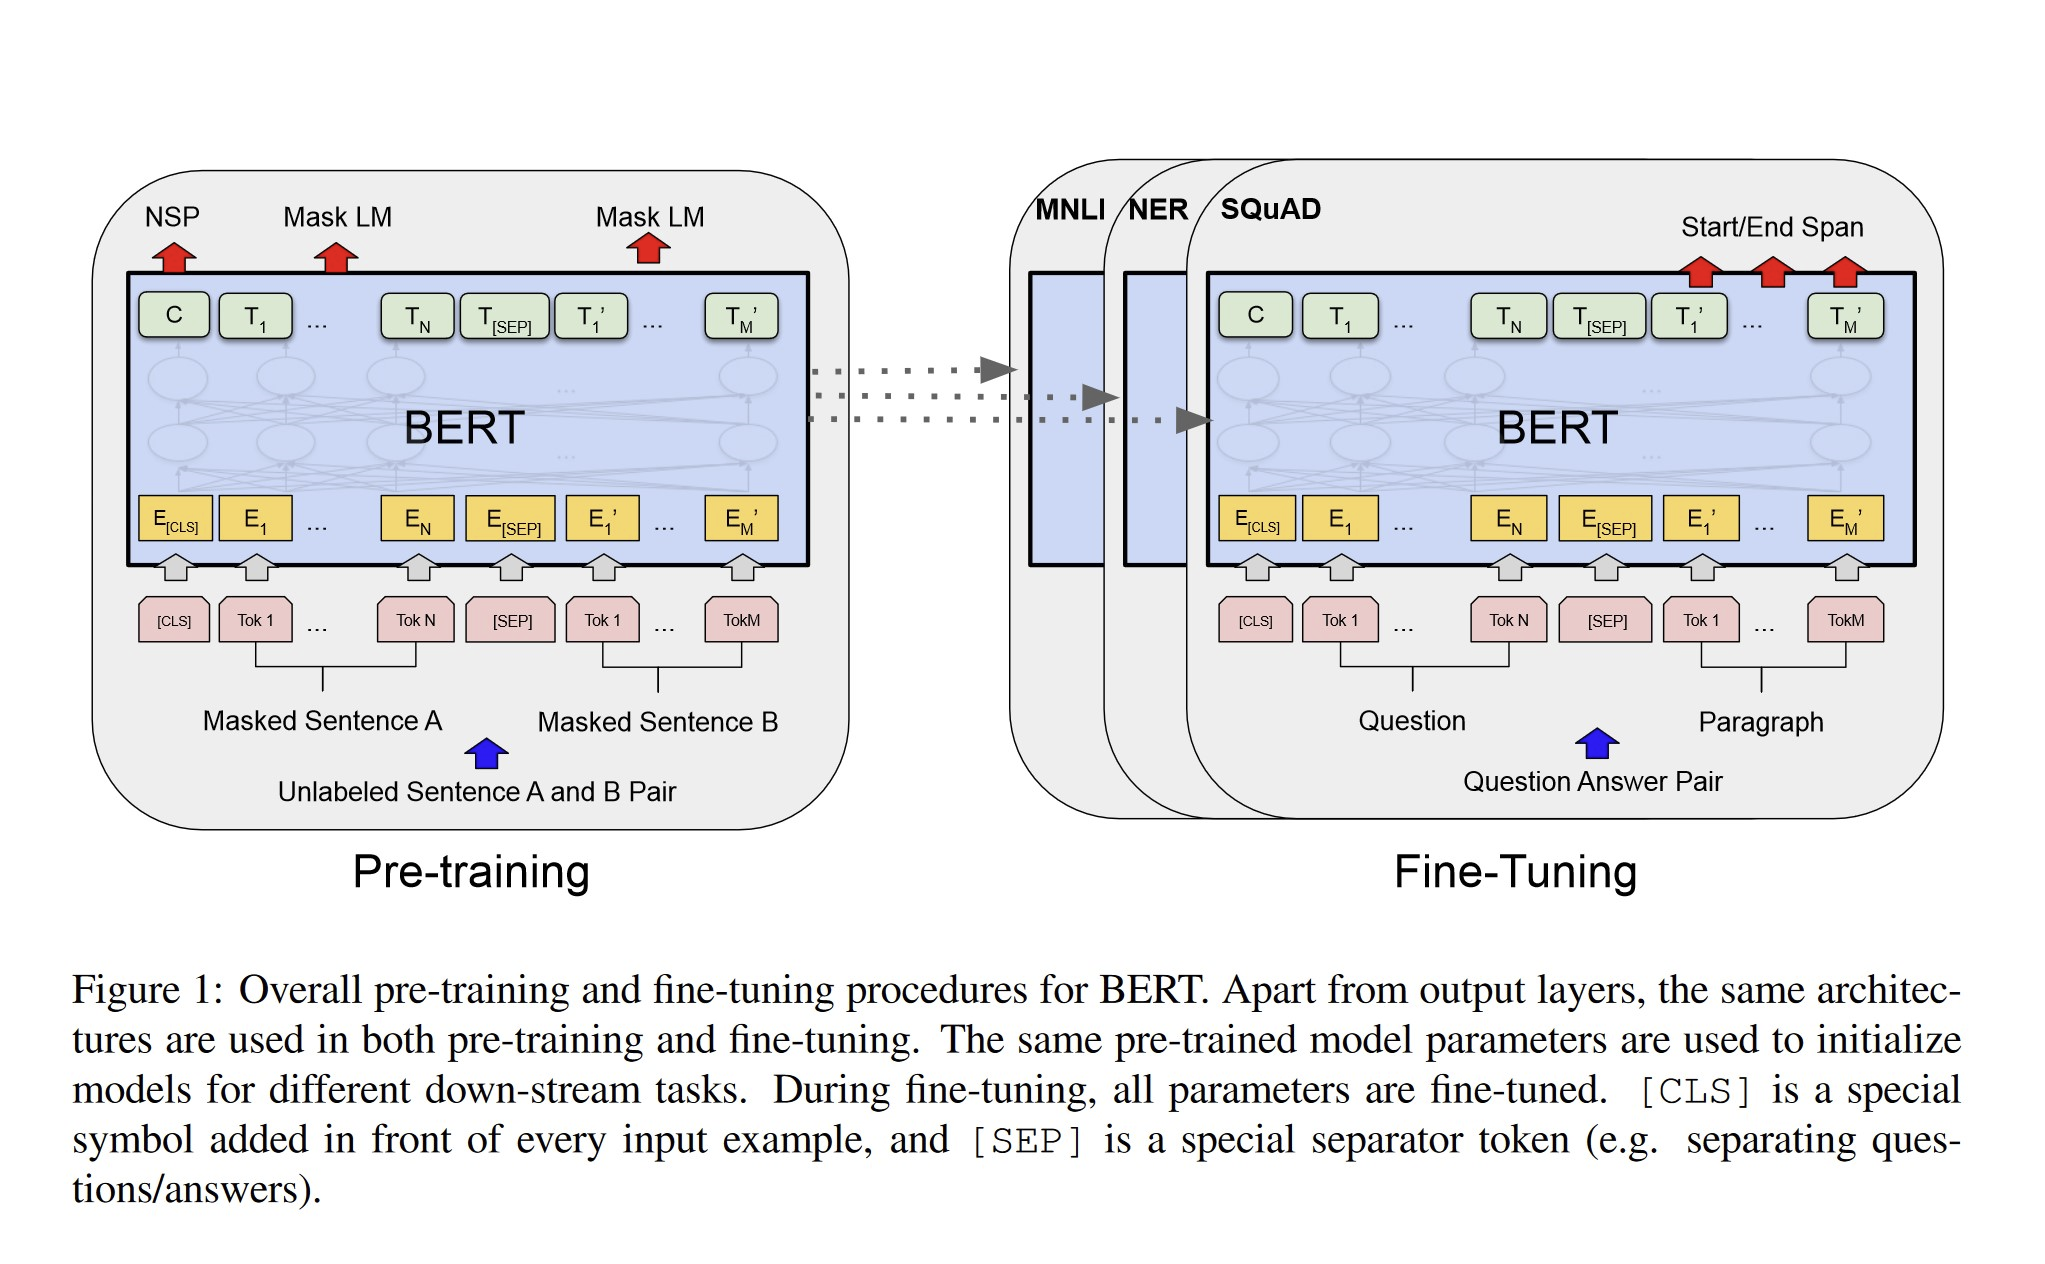

We use WordPiece embeddings (Wu et al.,
2016) with a 30,000 token vocabulary. The first
token of every sequence is always a special clas-
sification token ([CLS]). The final hidden state
corresponding to this token is used as the ag-
gregate sequence representation for classification
tasks. Sentence pairs are packed together into a
single sequence. We differentiate the sentences in
two ways. First, we separate them with a special
token ([SEP]). Second, we add a learned embed-
ding to every token indicating whether it belongs
to sentence A or sentence B. As shown in Figure 1,
we denote input embedding as E, the final hidden
vector of the special [CLS] token as C ∈ RH ,
and the final hidden vector for the ith input token
as Ti ∈ RH .
For a given token, its input representation is
constructed by summing the corresponding token,
segment, and position embeddings. A visualiza-
tion of this construction can be seen in Figure 2

## Masked Language Modelling

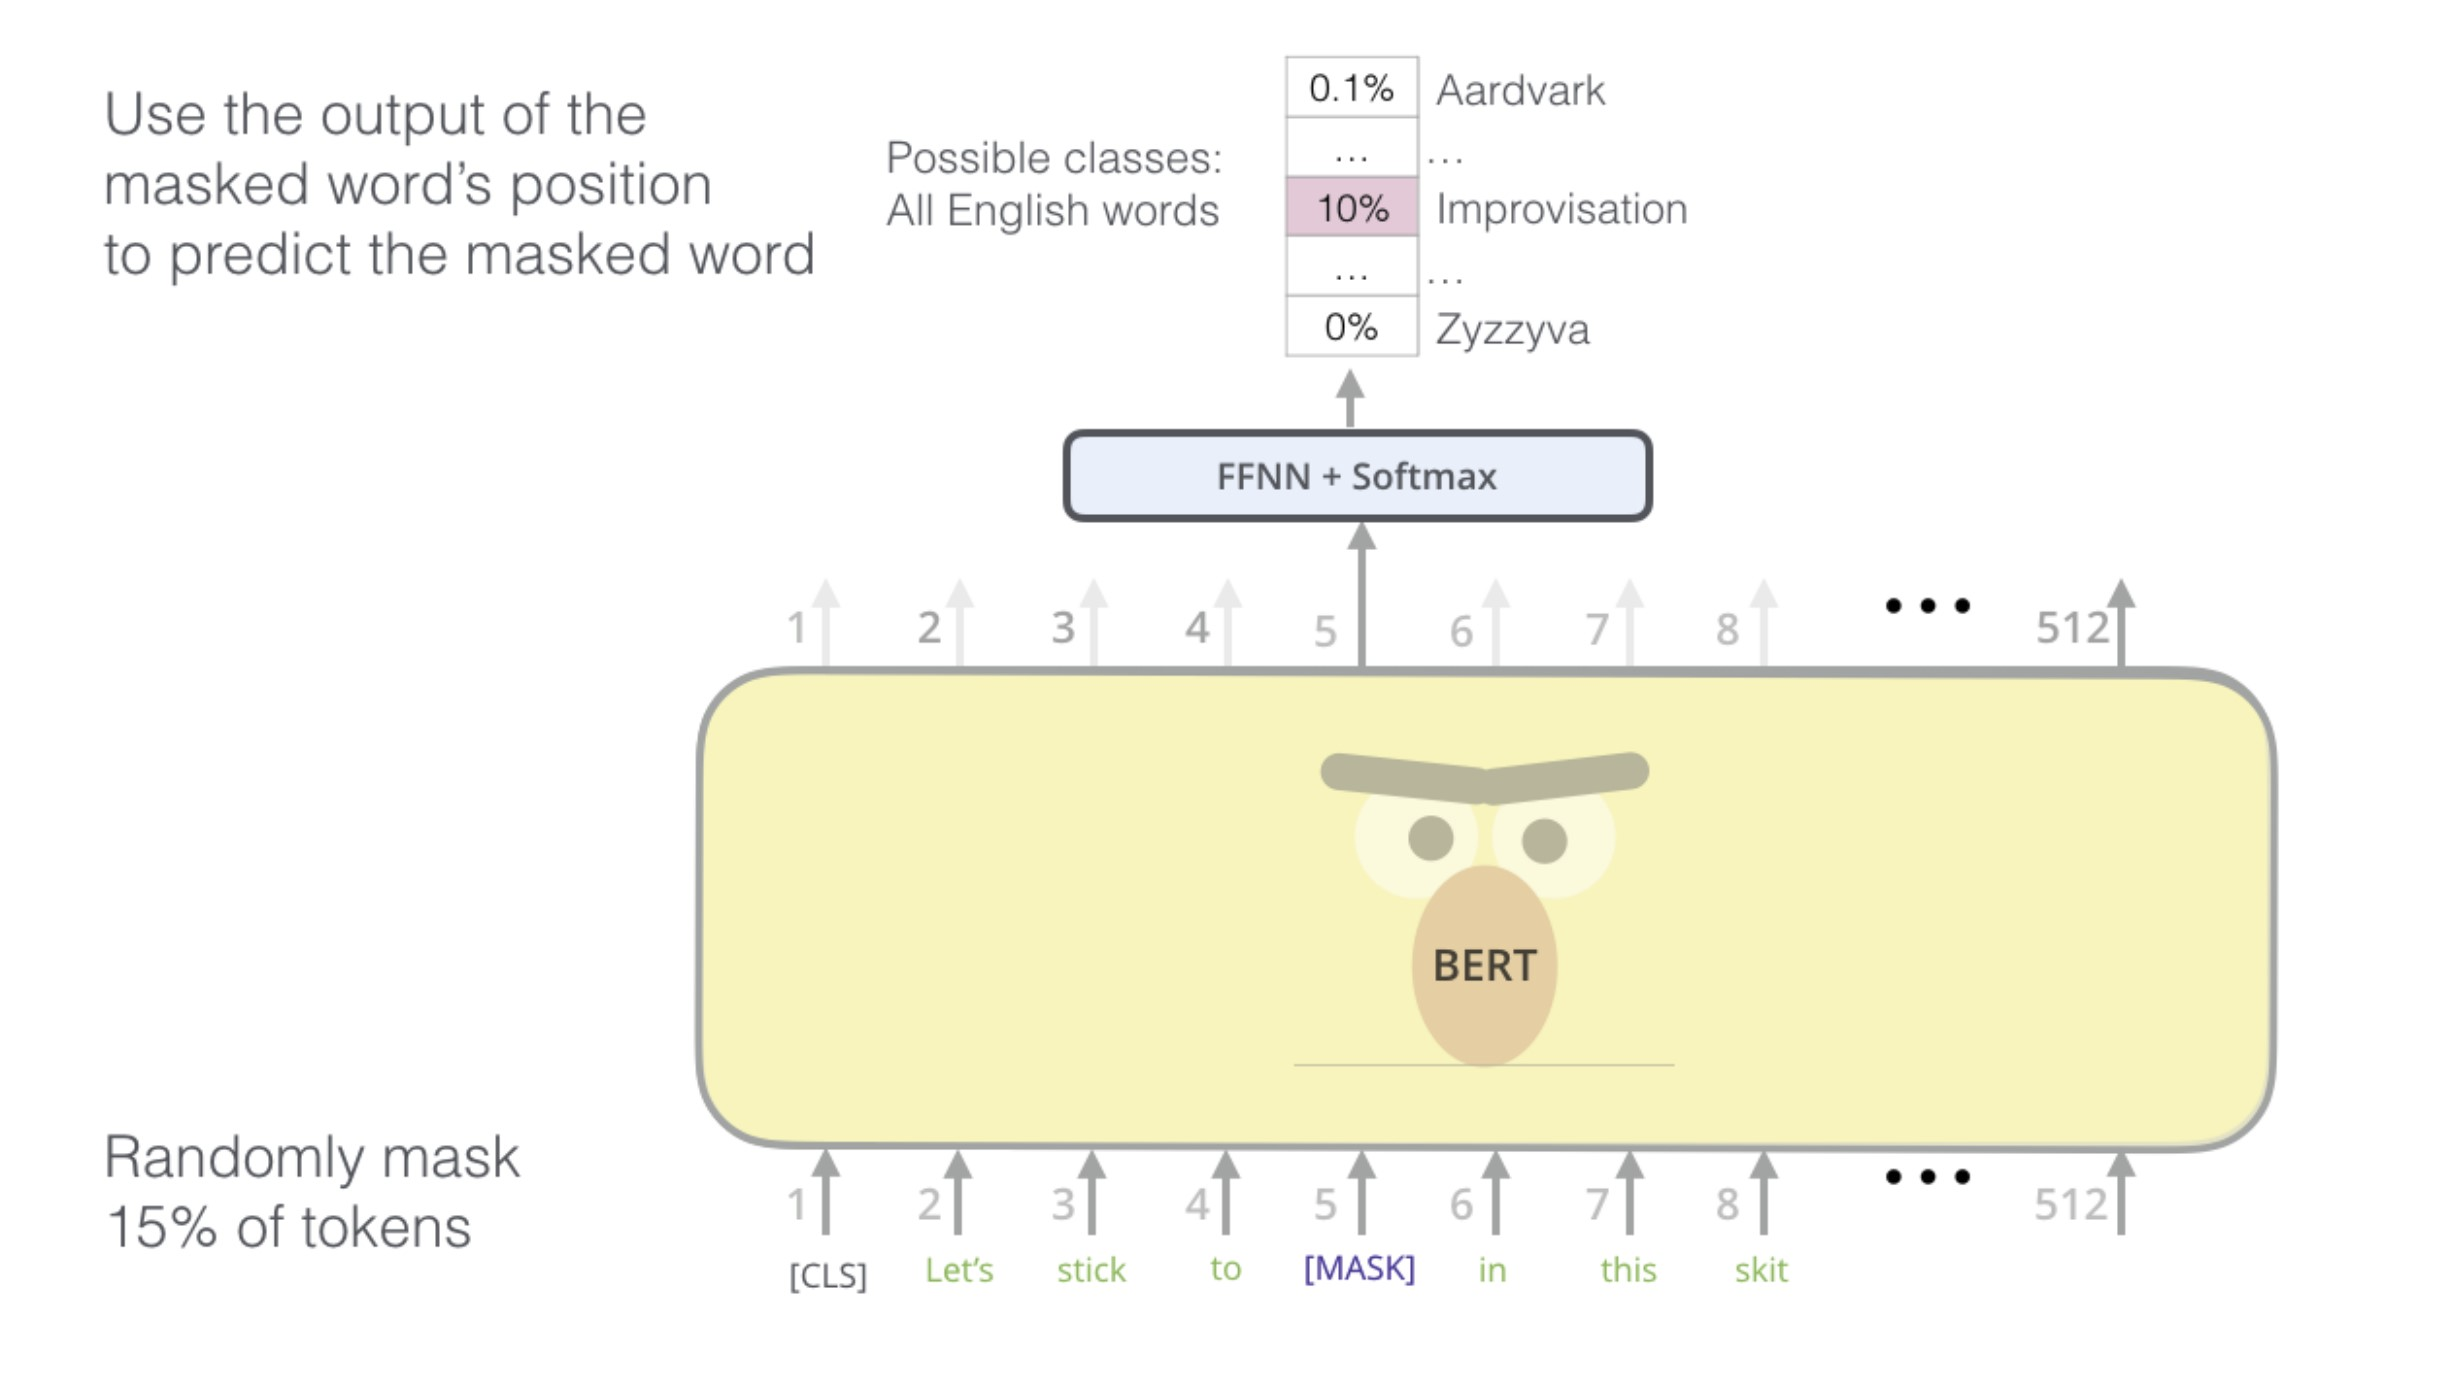

## Next Sentence Prediction

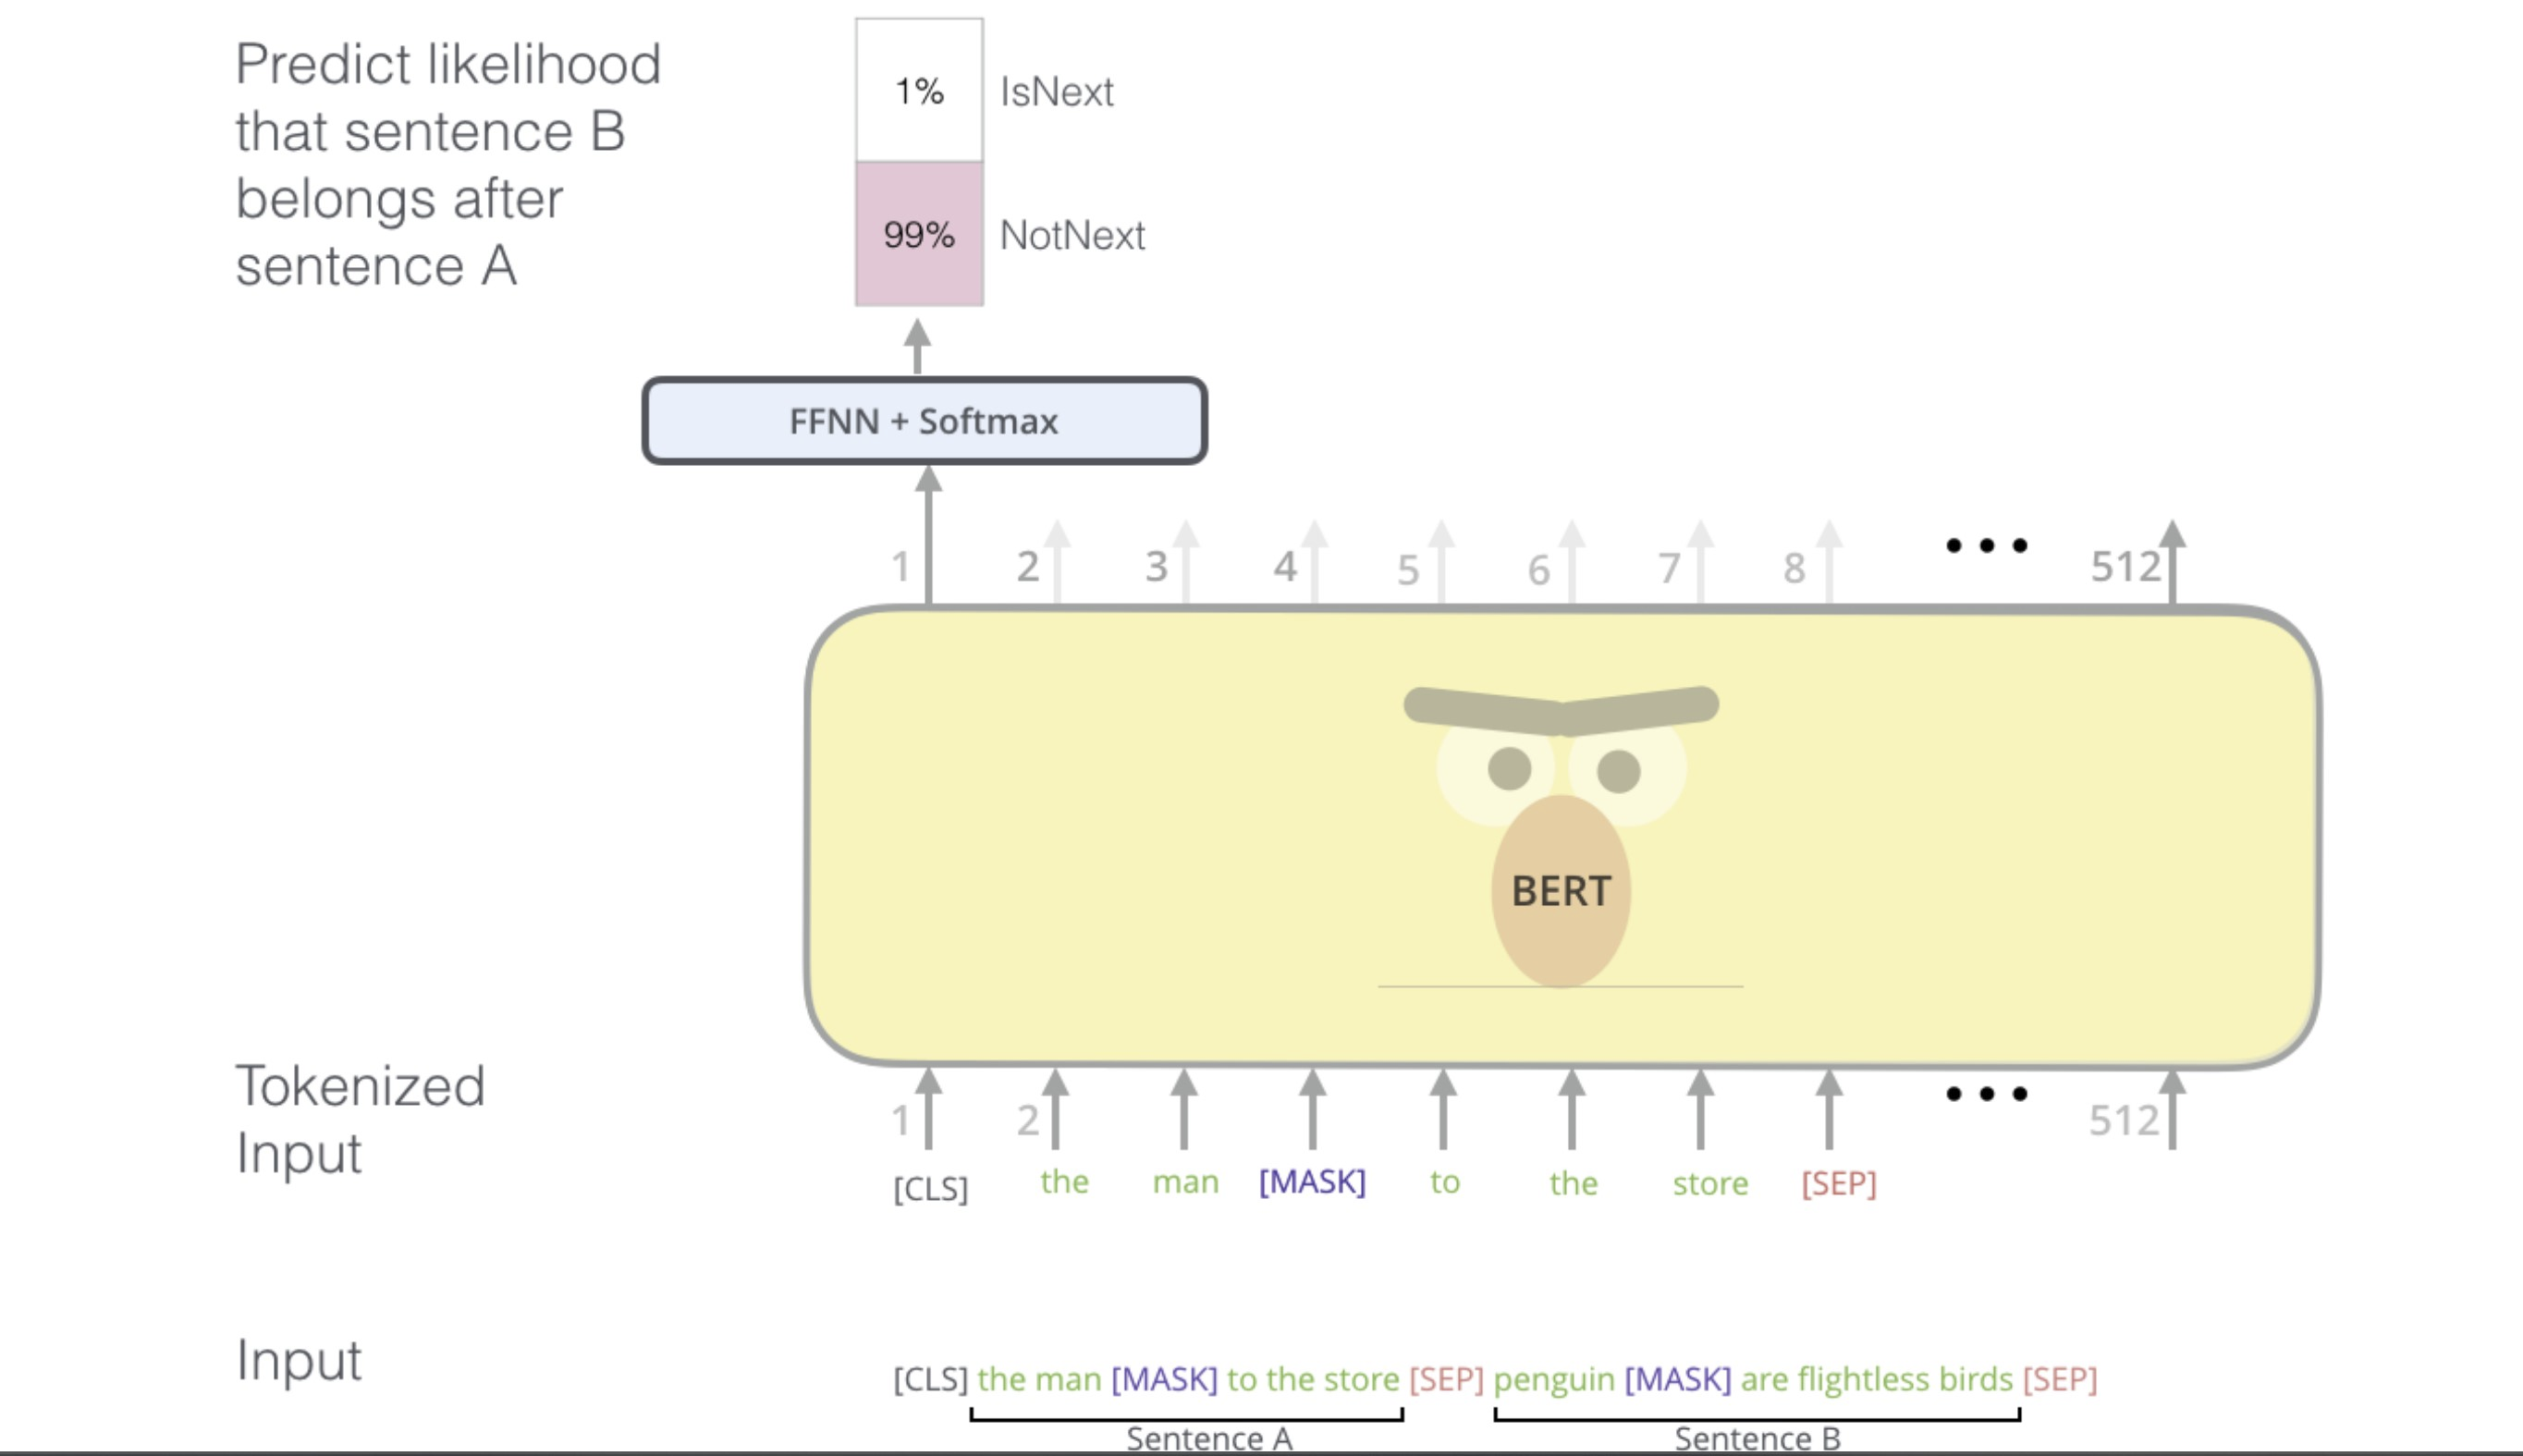

## Studying the encoder outputs 

This page has list of all available bert models on tensorflow hub 

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [22]:
pip install --default-timeout=100 tensorflow-text

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:


preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"



In [4]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

This SavedModel implements the encoder API for text embeddings with transformer encoders. It expects a dict with three int32 Tensors as input: input_word_ids, input_mask, and input_type_ids

In [22]:


text_test = ['I deposited money at the bank','I deposited money at the bank']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()



dict_keys(['input_type_ids', 'input_word_ids', 'input_mask'])

In [23]:
print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"]}')
print(f'Input Mask : {text_preprocessed["input_mask"]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"]}')


Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (2, 128)
Word Ids   : [[  101  1045 14140  2769  2012  1996  2924   102     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [  101  1045 14140  2769  2012  1996  2924   102     0     0     0     0
      0     0     0     0     0     

In [3]:


bert_model = hub.KerasLayer(encoder_url)




In [24]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {encoder_url}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')


Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
Pooled Outputs Shape:(2, 768)
Pooled Outputs Values:[-0.6335036  -0.15912798  0.70064145  0.23789899 -0.36264604 -0.03991608
  0.7103103   0.06206353  0.5491746  -0.9981458   0.27230787 -0.00536387]
Sequence Outputs Shape:(2, 128, 768)
Sequence Outputs Values:[[ 0.2648022   0.31464565  0.07354611 ...  0.03115616  0.00530342
   0.24055707]
 [ 0.70859504 -0.01121734  0.0890084  ... -0.49432442  0.5450213
  -0.03496337]
 [ 0.18905516 -0.3614526   0.4886495  ...  0.06284427 -0.29083413
  -0.02081757]
 ...
 [ 0.09602314 -0.09523273  0.30062553 ...  0.6033697   0.10209306
  -0.11433922]
 [ 0.16647843 -0.08120763  0.3003333  ...  0.49049643  0.11249188
   0.00384711]
 [ 0.00185447 -0.12702593  0.33271322 ...  0.6269296   0.09413846
  -0.0849941 ]]


In [17]:
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

In [25]:
bert_results['sequence_output'][0][6] == bert_results['sequence_output'][1][6]

<tf.Tensor: shape=(768,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [36]:
bert_results['sequence_output'][0][127]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([ 2.83078194e-01,  2.00088978e-01,  6.78534031e-01,  1.04187518e-01,
        2.20751897e-01,  1.79682449e-01, -1.19757101e-01,  2.17428714e-01,
        3.34826946e-01, -1.11352608e-01,  2.20016763e-02,  2.54892349e-01,
        1.28718793e-01,  8.51526558e-02,  1.80677414e-01, -2.47080252e-01,
        5.10391235e-01,  1.50178716e-01,  4.58887592e-02, -2.39268899e-01,
        6.94918707e-02, -1.62804186e-01, -6.84838519e-02, -4.02887017e-02,
        1.11099601e-01,  4.39634100e-02, -2.21194774e-01,  8.64050612e-02,
       -1.36803091e-01,  1.07230216e-01,  2.26962775e-01,  4.75551039e-02,
        2.83004791e-02,  7.51875639e-02, -4.46919441e-01,  1.55270830e-01,
        8.86637941e-02, -2.27371037e-01, -3.58076215e-01, -3.31112415e-01,
       -1.24606952e-01, -2.82151401e-01,  9.94408503e-02, -1.32156774e-01,
       -3.81168962e-01,  2.62715369e-01,  9.46763083e-02, -1.75675079e-01,
       -1.55370906e-02, -4.89405632e-01, -3.60505551

In [2]:
pip uninstall tf-models-official

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tf-models-official

  Using cached tf_models_official-2.13.1-py2.py3-none-any.whl (2.6 MB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached PyYAML-5.3.1-cp39-cp39-win_amd64.whl (212 kB)
  Using cached pycocotools-2.0.7-cp39-cp39-win_amd64.whl (85 kB)
  Using cached immutabledict-3.0.0-py3-none-any.whl (4.0 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached tf_models_official-2.13.0-py2.py3-none-any.whl (2.6 MB)
  Using cached tf_models_official-2.12.1-py2.py3-none-any.whl (2.6 MB)
  Using cached tensorflow-2.12.1-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached Cython-3.0.0-cp39-cp39-win_amd64.whl (2.8 MB)
  Using cached sacrebleu-2.3.1-py3-none-any.whl (118 kB)
  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl (38.0 MB)
  Using cached tf_models_official-2.12.0-py2.py3-none-any.whl (2.6 MB)
  Using cached tensorflow_addons-0.21.0-cp39-cp39-win_amd64.whl (729 kB)
  Using cached tf_models_official-2.11.6-py2.py3-none-any.whl (2.4 MB)
  Using cac

In [1]:
import os
import shutil

import tensorflow as tf
from tensorflow_models import nlp
#from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')


C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an is

ImportError: cannot import name 'array_record_module' from 'array_record.python' (C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\array_record\python\__init__.py)

In [31]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)


21372928/84125825 [======>.......................] - ETA: 4:24

KeyboardInterrupt: 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


## Spam classification using DISTILBert

### Importing the dataset

In [ ]:


import pandas as pd
df=messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
df.head()


In [22]:
df.shape
     

(5572, 2)

In [23]:

X=list(df['message'])  
y=list(df['label'])

In [24]:

y=list(pd.get_dummies(y,drop_first=True)['spam'])

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
     

In [26]:
X

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

### encoding the inputs

In [17]:

from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
     

In [18]:


train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [27]:
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [28]:
train_encodings[0]

Encoding(num_tokens=238, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [29]:


import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

### fine tuning the BERT model

In [30]:


from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    eval_steps = 10,
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)
     


In [31]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [32]:

trainer.evaluate(test_dataset)
     
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[ 3.1022956, -3.1589427],
       [-3.0821607,  3.136658 ],
       [ 3.0509737, -3.1124434],
       ...,
       [ 3.0331042, -3.034146 ],
       [-3.1517704,  3.2355945],
       [ 2.8066628, -2.850092 ]], dtype=float32), label_ids=array([0, 1, 0, ..., 0, 1, 0]), metrics={'eval_loss': 0.021236983367374965})

In [33]:

output=trainer.predict(test_dataset)[1]

In [34]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,output)
cm

array([[955,   0],
       [  0, 160]], dtype=int64)

## ZeroShot inference


In [3]:
from transformers import pipeline

pipe = pipeline(model="facebook/bart-large-mnli")
pipe("I have a problem with my iphone that needs to be resolved asap!",
    candidate_labels=["urgent","not urgent", "phone", "tablet", "computer"],
)


C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Shivam\anaconda3\envs\workspace\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Shivam\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see 

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5227571725845337,
  0.458141028881073,
  0.014264789409935474,
  0.0026849950663745403,
  0.0021520687732845545]}